# Santander Customer Transaction Prediction - Random Forest Basics

In the Kaggle competition, the objective is to identify which customer will make a transaction in the future.

**Link to the competition**: https://www.kaggle.com/c/santander-customer-transaction-prediction/  
**Type of Problem**: Classification  
**Metric for evalution**: AOC (Area Under Curve)

This Python 3 environment comes with many helpful analytics libraries installed
It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt 

from sklearn import metrics

In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/santander-customer-transaction-prediction/sample_submission.csv
/kaggle/input/santander-customer-transaction-prediction/train.csv
/kaggle/input/santander-customer-transaction-prediction/test.csv


## Step1: Read Training Dataset

In [3]:
input_dir = '/kaggle/input/santander-customer-transaction-prediction/'

df_train = pd.read_csv(input_dir + '/train.csv')
df_train

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


## Step2: Split data into train and validation set

In [4]:
var_columns = [c for c in df_train.columns if c not in ('ID_code','target')]

X = df_train.loc[:, var_columns]
y = df_train.loc[:, 'target']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((160000, 200), (40000, 200), (160000,), (40000,))

## Step3: Create a Random Forest Model

Define Model Parameters and create the model

In [5]:
num_trees = 150

model_rf = RandomForestClassifier(n_estimators=num_trees,
                                  max_depth=4,
                                  class_weight='balanced')
model_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4, n_estimators=150)

Let us look at the performance on Training and Validation data

In [6]:
y_train_pred = model_rf.predict(X_train)
y_valid_pred = model_rf.predict(X_valid)

print('AUC Train: {:.4f}\nAUC Valid = {:.4f}'.format(metrics.roc_auc_score(y_train, y_train_pred),
                                                     metrics.roc_auc_score(y_valid, y_valid_pred)))

AUC Train: 0.7093
AUC Valid = 0.6965


## Step 4: Understanding Probability of prediction

We can also look at the probability of prediction from the decision tree

In [7]:
y_valid_prob = model_rf.predict_proba(X_valid)

print("Probabilities",
      "\n",
      y_valid_prob[:10], 
      "\n\nPredictions\n",
      np.array(y_valid_pred[:10]))

Probabilities 
 [[0.5623344  0.4376656 ]
 [0.47866961 0.52133039]
 [0.53493225 0.46506775]
 [0.55329456 0.44670544]
 [0.47042956 0.52957044]
 [0.53616963 0.46383037]
 [0.58198981 0.41801019]
 [0.48418903 0.51581097]
 [0.5670752  0.4329248 ]
 [0.5756257  0.4243743 ]] 

Predictions
 [0 1 0 0 1 0 0 1 0 0]


In [8]:
model_rf.classes_

array([0, 1])

We can also find out the probability of prediction from each individual tree

In [9]:
y_train_prob_tree = np.stack([m.predict_proba(X_train)[:,1] for m in model_rf.estimators_])
y_valid_prob_tree = np.stack([m.predict_proba(X_valid)[:,1] for m in model_rf.estimators_])

y_train_prob_tree.shape, y_valid_prob_tree.shape

((150, 160000), (150, 40000))

The mean value of the predictions from each tree can be used to find the probability score from Random Forest  
A **threshold value** of `0.5` is used to identify classes in this binary class problem  
In actual algo, the class label with the maximum probability is chosen as the predicted class  

In [10]:
y_train_pred_tree = (y_train_prob_tree.mean(0) > 0.5).astype(int)
y_valid_pred_tree = (y_valid_prob_tree.mean(0) > 0.5).astype(int)

y_train_pred_tree.shape, y_valid_pred_tree.shape

((160000,), (40000,))

Let us compare our predicted classes from individual trees from the predictions from `model_rf.predict()`  
Notice below that the the class labels are exactly same for both training and validation datasets

In [11]:
sum(y_train_pred_tree-y_train_pred), sum(y_valid_pred_tree-y_valid_pred)

(0, 0)

## Step5: Find the model performance with respect to number of trees

Let us repeat the earlier steps to find probabilities for each tree

In [12]:
# Repeating same code
y_train_prob_tree = np.stack([m.predict_proba(X_train)[:,1] for m in model_rf.estimators_])
y_valid_prob_tree = np.stack([m.predict_proba(X_valid)[:,1] for m in model_rf.estimators_])

# Find AUC for different levels of Trees
train_auc_trees = [metrics.roc_auc_score(y_train, (y_train_prob_tree[:i+1].mean(0) > 0.5).astype(int)) for i in range(num_trees)]
valid_auc_trees = [metrics.roc_auc_score(y_valid, (y_valid_prob_tree[:i+1].mean(0) > 0.5).astype(int)) for i in range(num_trees)]

len(train_auc_trees), len(valid_auc_trees)

(150, 150)

Plot AUC with number of trees.  
Notice that the AUC is more or less stable after about 100 trees

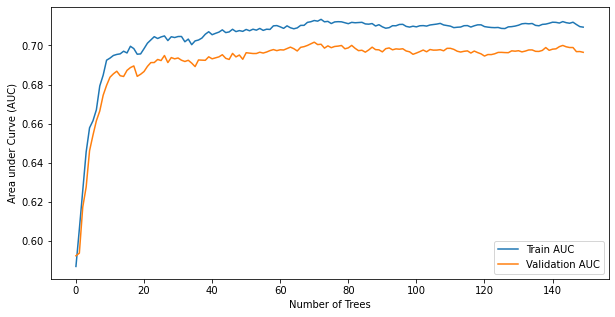

In [13]:
plt.figure(figsize=(10,5))

plt.plot(train_auc_trees, label='Train AUC')
plt.plot(valid_auc_trees, label='Validation AUC')

plt.ylabel('Area under Curve (AUC)')
plt.xlabel('Number of Trees')

plt.legend()
plt.show()

## Step 6: Find predicted values for test data
Create the final model with entire training data

In [14]:
model_rf = RandomForestClassifier(n_estimators=100,
                                  max_depth=4,
                                  class_weight='balanced')
model_rf.fit(X, y)

RandomForestClassifier(class_weight='balanced', max_depth=4)

First read the test and sample submission data

In [15]:
df_test = pd.read_csv(input_dir + '/test.csv')
df_sample_subm = pd.read_csv(input_dir + '/sample_submission.csv')

df_test.shape, df_sample_subm.shape

((200000, 201), (200000, 2))

In [16]:
X_test = df_test.loc[:,var_columns]

df_sample_subm['target'] = model_rf.predict(X_test)
df_sample_subm

,ID_code,target
0,test_0,1
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0
...,...,...
199995,test_199995,0
199996,test_199996,0
199997,test_199997,0
199998,test_199998,1


In [17]:
output_dir = '/kaggle/working/'
df_sample_subm.to_csv(output_dir + '02_random_forest_scores.csv', index=False)